# Machine Learning with the Iris Dataset

**Goal**: Load and explore the Iris dataset, train a basic machine learning model, and evaluate its performance.

**Steps**:
- Load & split the data
- Perform basic EDA
- Train a Logistic Regression model
- Evaluate test accuracy
- Identify the most important feature

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Load the Iris Dataset**

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Explore the Dataset**

In [4]:
print("Shape of data:", X.shape)
print("Classes:", iris.target_names)

Shape of data: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


In [5]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print("Missing Values Summary:")
print(X.isnull().sum())

Missing Values Summary:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


**Visualize the Data**

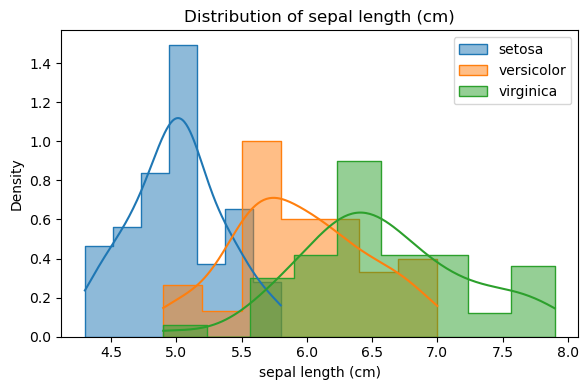

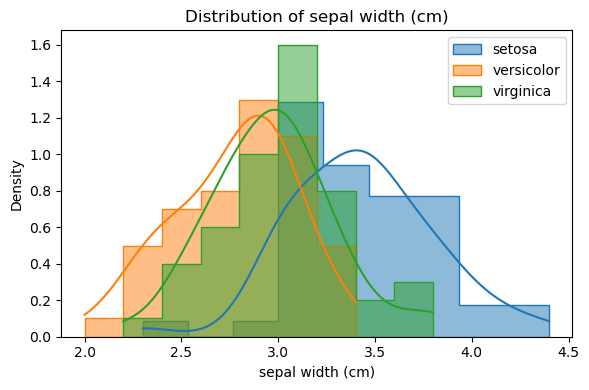

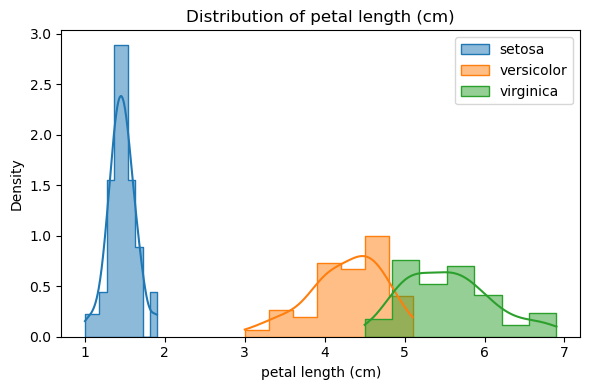

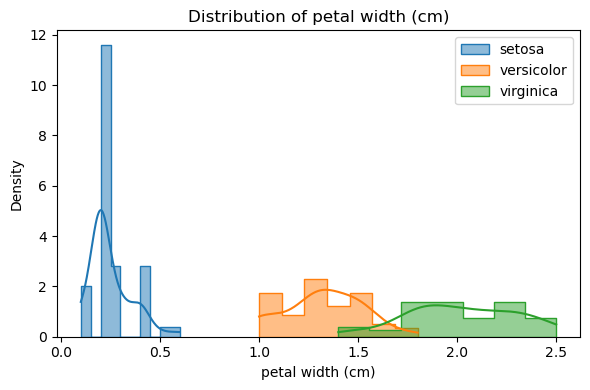

In [19]:
# Histograms of each feature, colored by class
for col in X.columns:
    plt.figure(figsize=(6, 4))
    for target_class in np.unique(y):
        sns.histplot(X[y == target_class][col], kde=True, label=iris.target_names[target_class], element='step', stat='density')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

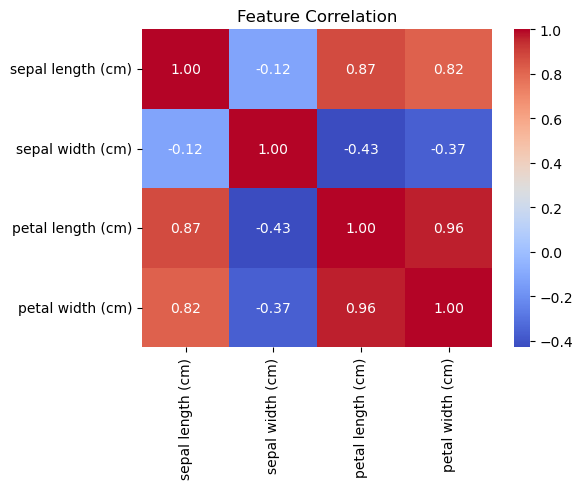

In [21]:
# Correlation heatmap of the features
plt.figure(figsize=(6, 5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

**Train/Test Split**

In [23]:
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 4)
Test set shape: (30, 4)


**Model Training: Logistic Regression classifier**

In [25]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

**Evaluate the Model**

In [27]:
# Predict and evaluate accuracy
y_pred = log_reg.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9666666666666667

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix

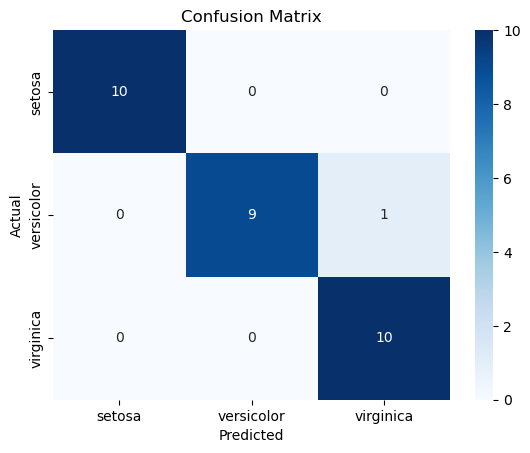

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature Importance Analysis**

In [32]:
# Identify which features contribute most to predictions
# Get feature importance from model coefficients
importance = log_reg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': np.abs(importance)
}).sort_values('Importance', ascending=False)

feature_importance

,Feature,Importance
2,petal length (cm),2.347358
3,petal width (cm),0.993403
1,sepal width (cm),0.827277
0,sepal length (cm),0.529556


C:\Users\mouak\AppData\Local\Temp\ipykernel_28792\2266330614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_d')


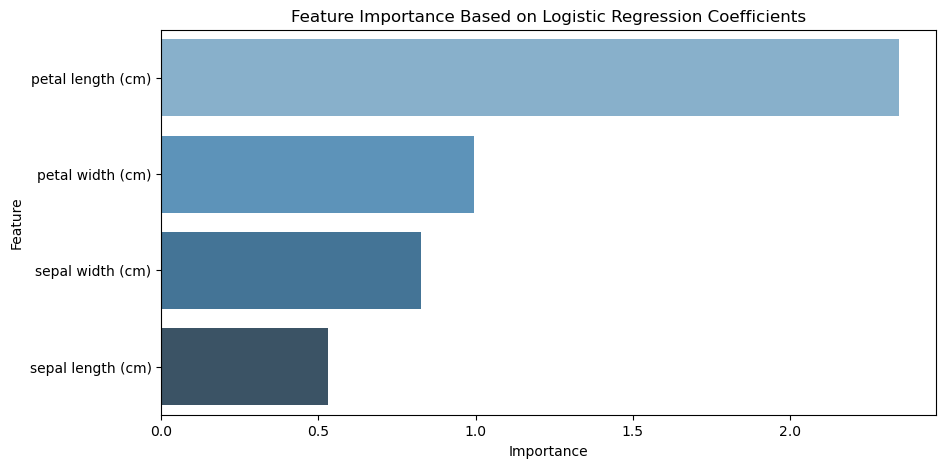

In [33]:
# Visualize importance
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_d')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.show()

**Key Insights**

- **Test Accuracy**: The model achieves `97%` accuracy
- **Most Important Feature**: petal length (cm) appears most significant based on coefficients